# Meridional heat transport and vertical diffusivity: Figure 5

Last modified May 5 2025

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import netCDF4

In [2]:
# get model experiments
def get_experiment_names(model):
    if model == 'FLOR':
        extension = 'tigercpu_intelmpi_18_576PE'
        exps = [
            'p6p0sol_CTL1860',
                'p4p0sol_CTL1860',
                'p2p0sol_CTL1860', 
                'p1p0sol_CTL1860',
                'CTL1860_newdiag',
                'm1p0sol_CTL1860', 
                'm2p0sol_CTL1860',
                'm4p0sol_CTL1860',
                'm6p0sol_CTL1860',
        ]

    if model == 'CM2.1p1':
        extension = 'tigercpu_intelmpi_18_80PE'
        exps = [
            'CTL1860_p6pctSolar', 
                'CTL1860_p4pctSolar',
                'CTL1860_p2pctSolar',
                'CTL1860_p1pctSolar', 
                'CTL1860',
                'CTL1860_m1pctSolar',
                'CTL1860_m2pctSolar',
                'CTL1860_m4pctSolar',
                'CTL1860_m6pctSolar',
                ]
    return exps, extension


In [3]:
# import data loading function
# import sys
# if '/tigress/wenchang/wython' not in sys.path:
#     sys.path.append('/tigress/wenchang/wython')
    
# from misc.modelout import get_modelout_data, get_modelout_files

import sys
if '/tigress/wenchang/wython/' not in sys.path:
    sys.path.append('/tigress/wenchang/wython/')
    
from modelout.modelout import get_modelout_data, get_modelout_files

# load MHT data

In [4]:
# load Pacific meridional heat transport in both models for -4% and -6% Solar experiments

lat = 40

# FLOR_Amht_m4 = xr.open_dataarray(f'./processed_data/mht_lat{lat}_annavg_ts_Atlantic_FLOR_m4p0sol_CTL1860.0101-1187.nc')
# FLOR_Amht_m6 = xr.open_dataarray(f'./processed_data/mht_lat{lat}_annavg_ts_Atlantic_FLOR_m6p0sol_CTL1860.0101-0597.nc')
FLOR_Pmht_m4 = xr.open_dataarray(f'./processed_data/mht_lat{lat}_annavg_ts_IndoPacific_FLOR_m4p0sol_CTL1860.0101-1187.nc')
FLOR_Pmht_m6 = xr.open_dataarray(f'./processed_data/mht_lat{lat}_annavg_ts_IndoPacific_FLOR_m6p0sol_CTL1860.0101-0597.nc')

# CM21_Amht_m4 = xr.open_dataarray(f'./processed_data/mht_lat{lat}_annavg_ts_Atlantic_CM2.1p1_CTL1860_m4pctSolar.0101-2000.nc')
# CM21_Amht_m6 = xr.open_dataarray(f'./processed_data/mht_lat{lat}_annavg_ts_Atlantic_CM2.1p1_CTL1860_m6pctSolar.0101-1293.nc')
CM21_Pmht_m4 = xr.open_dataarray(f'./processed_data/mht_lat{lat}_annavg_ts_IndoPacific_CM2.1p1_CTL1860_m4pctSolar.0101-2000.nc')
CM21_Pmht_m6 = xr.open_dataarray(f'./processed_data/mht_lat{lat}_annavg_ts_IndoPacific_CM2.1p1_CTL1860_m6pctSolar.0101-1293.nc')

# shift the start year from 101 to zero
def shift_year(q):
    q = q.assign_coords(year=q.year - q.year.min())
    return q

FLOR_Pmht_m4 = shift_year(FLOR_Pmht_m4)
FLOR_Pmht_m6 = shift_year(FLOR_Pmht_m6)
CM21_Pmht_m4 = shift_year(CM21_Pmht_m4)
CM21_Pmht_m6 = shift_year(CM21_Pmht_m6)


In [5]:
def plot_MHT_pacific(ax):
    # input one axis

    #plt.style.use('../func/paper.mplstyle')
    
    linestyle = ['--','-']
    
    # Pacific mht
    (FLOR_Pmht_m4*1e-15).rolling(year=10,center=True).mean('year').plot(ax=ax,color='b',label='FLOR -4%',
                                                               linestyle = linestyle[0])
    (FLOR_Pmht_m6*1e-15).rolling(year=10,center=True).mean('year').plot(ax=ax,color='darkblue',label='FLOR -6%',
                                                               linestyle = linestyle[0])
    
    (CM21_Pmht_m4*1e-15).rolling(year=10,center=True).mean('year').plot(ax=ax,color='b', label='CM2.1 -4%',
                                                                linestyle=linestyle[1])
    (CM21_Pmht_m6*1e-15).rolling(year=10,center=True).mean('year').plot(ax=ax,color='darkblue', label='CM2.1 -6%',
                                                                linestyle=linestyle[1])
    #ax.set_title('Indo-Pacific')
    
    # plot stars for experiments that crashed
    IP_crash_x = [(FLOR_Pmht_m4*1e-15).rolling(year=10,center=True).mean('year').dropna('year').year.max(),
                  (FLOR_Pmht_m6*1e-15).rolling(year=10,center=True).mean('year').dropna('year').year.max(),
                  (CM21_Pmht_m6*1e-15).rolling(year=10,center=True).mean('year').dropna('year').year.max(),
                 933] # plot the first crash in CM2.1 -6%
    IP_crash_y = [(FLOR_Pmht_m4*1e-15).rolling(year=10,center=True).mean('year').dropna('year').isel(year=-1),
                  (FLOR_Pmht_m6*1e-15).rolling(year=10,center=True).mean('year').dropna('year').isel(year=-1),
                  (CM21_Pmht_m6*1e-15).rolling(year=10,center=True).mean('year').dropna('year').isel(year=-1),
                 (CM21_Pmht_m6*1e-15).rolling(year=10,center=True).mean('year').dropna('year').isel(year=933)]
    ax.scatter(IP_crash_x, IP_crash_y, color='r', marker='x', s=100,zorder=10)
    
    for ii in range(1):
        ax.legend()
        ax.set_ylabel('')
        ax.set_xlabel('')
        ax.grid(linestyle='--')
        ax.set_xlim(0,1900)
        #ax.set_xticks(np.arange(100,2100,100))
        #ax[ii].set_ylim(-5,50)
        ax.axhline(0,color='k',linewidth=1)
        
    ax.set_xlabel('Years')
    ax.set_ylabel('[PW]')
    
    if lat >= 0:
        ax.set_title(f'Indo-Pacific meridional heat transport across {lat}N (10-year running mean)')
    else:
        ax.set_title(f'Indo-Pacific meridional heat transport across {-lat}S (10-year running mean)')

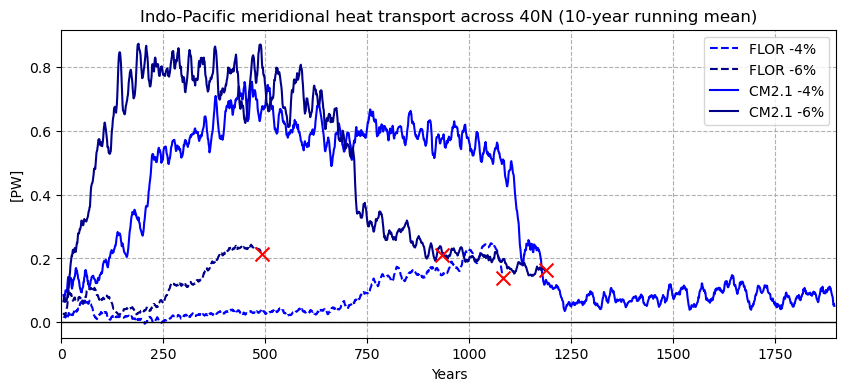

In [6]:
fig, ax = plt.subplots(1,1,figsize=(10,4),sharex=False, sharey=True)
plot_MHT_pacific(ax)

# Plot maps

In [7]:
# plot maps
# /tigress/mvchung/ANALYSIS/Solar_NEW/import_plot_NPacific_diffusivity_topography_wind.ipynb

In [8]:
# # load data: first 50 years of vertical diffusivity
# CM21 = xr.open_dataarray('./MODEL_OUT/diff_cbt_t_CM2.1p1_CTL1860_m6pctSolar_tigercpu_intelmpi_18_80PE_0101-0150_output.nc')
# FLOR = xr.open_dataarray('./MODEL_OUT/diff_cbt_t_FLOR_m6p0sol_CTL1860_tigercpu_intelmpi_18_576PE_0101-0150_output.nc')


In [9]:
# get difference between first 5 and last 5 years
def last10_minus_first10_JFM(da):
    da_first = da.sel(st_ocean=slice(50,2000)).mean('st_ocean').isel(time=slice(0,10*12)).groupby('time.month').mean('time').isel(month=slice(0,3)).mean('month')
    da_last = da.sel(st_ocean=slice(50,2000)).mean('st_ocean').isel(time=slice(-10*12,None)).groupby('time.month').mean('time').isel(month=slice(0,3)).mean('month')

    diff = da_last - da_first
    return diff

In [10]:
# %time
# CM21_diff = last10_minus_first10_JFM(CM21)
# FLOR_diff = last10_minus_first10_JFM(FLOR)

In [11]:
# # save to processed_data
# CM21_diff.to_netcdf('./processed_data/diff_cbt_t_141-150_minus_101-110_CM2.1p1_CTL1860_m6pctSolar_tigercpu_intelmpi_18_80PE.nc')
# FLOR_diff.to_netcdf('./processed_data/diff_cbt_t_141-150_minus_101-110_FLOR_m6p0sol_CTL1860_tigercpu_intelmpi_18_576PE.nc')

In [12]:
CM21_diff = xr.open_dataarray('./processed_data/diff_cbt_t_141-150_minus_101-110_CM2.1p1_CTL1860_m6pctSolar_tigercpu_intelmpi_18_80PE.nc')
FLOR_diff = xr.open_dataarray('./processed_data/diff_cbt_t_141-150_minus_101-110_FLOR_m6p0sol_CTL1860_tigercpu_intelmpi_18_576PE.nc')

In [13]:
def plot_map(ax,da,modelname, 
             lat1, lat2, lon1, lon2):
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    
    # Define the projection with central longitude set to -180
    #proj = ccrs.PlateCarree(central_longitude=-180)
    
    # Create the figure and axis with the Cartopy projection
    #fig, ax = plt.subplots(subplot_kw={'projection': proj}, figsize=(4,4))
    
    # Plot the data
    p = da.plot(
        ax=ax, 
        transform=ccrs.PlateCarree(),  # Specify the data's coordinate reference system
        vmin=-2, vmax=2, cmap='RdBu_r', 
        add_colorbar=False, rasterized=True
        # cbar_kwargs={
        #     'label': 'm^2/s',
        #     'extend': 'both',
        #     'shrink': 0.7 # Extend the colorbar in both directions
        # }
    )
    
    # Add features to the map
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightgray')
    
    # Set the extent of the map (longitude and latitude bounds)
    ax.set_extent([-220, -110, 0, 70], crs=ccrs.PlateCarree())
    
    # Add a title
    #ax.set_title(f'JFM diffusivity change\nyrs 40-50 minus 0-10')
    
    # Add 'CM2.1' in bold, large font in the upper left corner
    ax.text(
        -215, 15,  # Upper-left corner (adjust coordinates as necessary)
        modelname, 
        fontsize=20,  # Large font size
        fontweight='bold',  # Bold text
        transform=ccrs.PlateCarree()  # Use the same projection as the data
    )
    
    # Plot the box
    #lat1, lat2 = 40, 55#40, 55
    #lon1, lon2 = -190, -140#-170, -130
    ax.plot(
        [lon1, lon2, lon2, lon1, lon1],  # Longitude bounds (close the rectangle)
        [lat1, lat1, lat2, lat2, lat1],  # Latitude bounds (close the rectangle)
        color='black', linewidth=2, transform=ccrs.PlateCarree()
    )
    
    #plt.show()

    return p


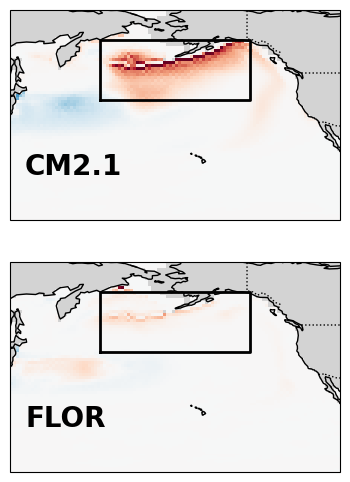

In [19]:
import cartopy.crs as ccrs
fig, ax = plt.subplots(2,1,subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-180)}, figsize=(8,6))
plot_map(ax[0],CM21_diff,modelname='CM2.1', lat1=40, lat2=60, lon1=-190, lon2=-140)  # First map
plot_map(ax[1],FLOR_diff,modelname='FLOR', lat1=40, lat2=60, lon1=-190, lon2=-140)  # Second map

In [49]:
# plot with ice edge

In [97]:
def plot_contours_icemonth_years(da, ax,
                             firstyear=-50, lastyear=None,
                                color='k'):
    t_temp = da.year.isel(year=slice(firstyear,lastyear))
    y0, y1 = t_temp.min(), t_temp.max()

    ctr = da.isel(year=slice(firstyear,lastyear)).mean('year').plot.contour(ax=ax,levels=[1],
                                                                      x='xt',colors=color,zorder=1, transform=ccrs.PlateCarree())
    
    ax.set_title(f'')
    ax.set_ylabel('')
    ax.set_xlabel('')
    #ax.set_facecolor('gray')
    
    return ctr

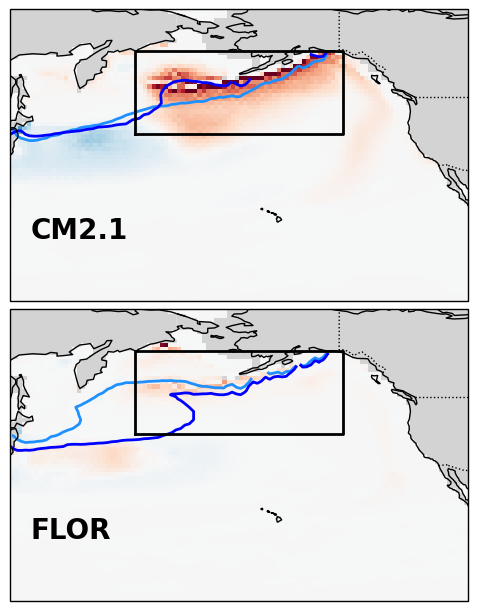

In [98]:
# import ice

fig, ax = plt.subplots(2,1,subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-180)}, figsize=(8,6))
plot_map(ax[0],CM21_diff,modelname='CM2.1', lat1=40, lat2=60, lon1=-190, lon2=-140)  # First map
plot_map(ax[1],FLOR_diff,modelname='FLOR', lat1=40, lat2=60, lon1=-190, lon2=-140)  # Second map

CM21_m6_ice_months = xr.open_dataarray('./processed_data/count_ice_months_MI_CM2.1p1_CTL1860_m6pctSolar.nc')
FLOR_m6_ice_months = xr.open_dataarray('./processed_data/count_ice_months_MI_FLOR_m6p0sol_CTL1860.nc')

plot_contours_icemonth_years(CM21_m6_ice_months, ax[0], color='dodgerblue',
                                       firstyear=0, lastyear=10)
plot_contours_icemonth_years(CM21_m6_ice_months, ax[0], color='b',
                                       firstyear=40, lastyear=50)
plot_contours_icemonth_years(FLOR_m6_ice_months, ax[1], color='dodgerblue',
                                       firstyear=0, lastyear=10)
plot_contours_icemonth_years(FLOR_m6_ice_months, ax[1], color='b',
                                       firstyear=40, lastyear=50)

# select a box and make the Hovmollers in that box, draw on maps

In [55]:
def plot_hovmoller(fig, ax, CM21, FLOR,
                  levels1 = np.arange(0,1.1,0.1),
                  depth1=1000,depth2=0):
    # input 2 axes
    #fig, ax = plt.subplots(2,1,figsize=(12,7),sharex=True,sharey=True)

    t = np.arange(0,100,1/12)
    # if CM21.time.dtype == 'float64':
    #     t = CM21.time
    # else:
    #     t = np.arange(int(CM21.time.min().dt.year),
    #                   int(CM21.time.max().dt.year)+1, 
    #                   1/12)       
    d = FLOR.st_ocean
    
    cf0 = ax[0].contourf(t,d,CM21.transpose(),levels=levels1,extend='both')
    
    cf1 = ax[1].contourf(t,d,FLOR.transpose(),levels=levels1,extend='both')
     
    #ax[0].set_title('CM2.1 (ensemble mean) total vertical diffusivity')
    #ax[1].set_title('FLOR total vertical diffusivity')

    for axis in ax:
        axis.grid(True,linestyle='--',zorder=10)
        # Ensure the grid is above the contourf plot
        axis.set_axisbelow(False)
        axis.set_ylim(depth1,depth2)
    
    # colorbars
    #fig.colorbar(cf1,ax=ax,label=FLOR_m6.units,shrink=0.7)
    
    #fig.suptitle(f'{FLOR_m6.long_name} -6% Solar')
    ax[1].set_xlabel('Years')
    ax[0].set_ylabel('Depth [m]')
    ax[1].set_ylabel('Depth [m]')

    # plot model names
    ax[0].text(105, 1800, 'CM2.1', 
               color='white', fontsize=20, fontweight='bold')
    ax[1].text(105, 1800, 'FLOR', 
               color='white', fontsize=20, fontweight='bold')

    return cf0

In [56]:
# load data: first 50 years of vertical diffusivity
CM21 = xr.open_dataarray('./MODEL_OUT/diff_cbt_t_CM2.1p1_CTL1860_m6pctSolar_tigercpu_intelmpi_18_80PE_0101-0200_output.nc')
FLOR = xr.open_dataarray('./MODEL_OUT/diff_cbt_t_FLOR_m6p0sol_CTL1860_tigercpu_intelmpi_18_576PE_0101-0200_output.nc')


In [57]:
def get_box_avg(da, lat1=40, lat2=60, lon1=-190, lon2=-140):
    da_new = da.sel(xt_ocean=slice(lon1,lon2),
                    yt_ocean = slice(lat1, lat2)).mean(('xt_ocean','yt_ocean'))
    return da_new

CM21_box = get_box_avg(CM21)
FLOR_box = get_box_avg(FLOR)

In [58]:
# import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature

# plt.style.use('../func/paper.mplstyle')

# fig = plt.figure(figsize=(15, 11), constrained_layout=False)  
# gs = gridspec.GridSpec(3, 2, height_ratios=[1,1.5,1.5], width_ratios=[1,1.5])

# # Top timeseries plot spanning the full width
# ax0 = fig.add_subplot(gs[0, :])

# # Bottom row: Hovmöller on the left (wider) and two maps stacked on the right
# ax1 = fig.add_subplot(gs[1, 1])  # Hovmöller (wide)
# ax3 = fig.add_subplot(gs[2, 1])  # Hovmöller (wide) sharing x and y

# ax2 = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree(central_longitude=-180))  # Top map
# ax4 = fig.add_subplot(gs[2, 0], projection=ccrs.PlateCarree(central_longitude=-180))  # Bottom map

# #fig.set_constrained_layout_pads(w_pad=5, h_pad=5)

# # Plot functions
# plot_MHT_pacific(ax0)
# cf = plot_hovmoller(fig, [ax1, ax3], CM21_box, FLOR_box, depth1=2000, depth2=0)
# ax1.set_title('vertical diffusivity (CM2.1)')
# ax3.set_title('vertical diffusivity (FLOR)')

# p = plot_map(ax2,CM21_diff,modelname='CM2.1', lat1=40, lat2=60, lon1=-190, lon2=-140)  # First map
# plot_map(ax4,FLOR_diff,modelname='FLOR', lat1=40, lat2=60, lon1=-190, lon2=-140)  # Second map
# ax2.set_title('vertical diffusivity change (JFM)')
# ax4.set_title('vertical diffusivity change (JFM)')

# plt.tight_layout()

# #colorbars
# fig.colorbar(cf,ax=[ax1, ax3],label=FLOR.units,shrink=0.7,orientation='horizontal',pad=0.1)
# fig.colorbar(p,ax=[ax2, ax4],label=FLOR.units,shrink=1,orientation='horizontal', extend='both',pad=0.1)

# #fig.suptitle('-6% Solar')
# #plt.savefig("Figure4.png", bbox_inches='tight', dpi=300)  # Prevents clipping
# plt.show()

# Load T, S data and compute density and $N^2$

In [59]:
# Note lat/lon bounds may be different

In [60]:
# load FLOR -6% Solar data
FLOR_m6_temp = xr.open_dataarray('./MODEL_OUT/NPacific/temp_FLOR_m6p0sol_CTL1860_tigercpu_intelmpi_18_576PE_0101-0200_NPacific.nc')
FLOR_m6_salt = xr.open_dataarray('./MODEL_OUT/NPacific/salt_FLOR_m6p0sol_CTL1860_tigercpu_intelmpi_18_576PE_0101-0200_NPacific.nc')
#FLOR_m6_rho = xr.open_dataarray('./MODEL_OUT/NPacific/pot_rho_0_FLOR_m6p0sol_CTL1860_tigercpu_intelmpi_18_576PE_0101-0200_NPacific.nc')
FLOR_ds_m6 = xr.merge([FLOR_m6_temp,FLOR_m6_salt])#,FLOR_m6_rho])

In [61]:
# load FLOR control data
FLOR_temp = xr.open_dataarray('./MODEL_OUT/NPacific/temp_FLOR_CTL1860_newdiag_tigercpu_intelmpi_18_576PE_0101-0200_NPacific.nc')
FLOR_salt = xr.open_dataarray('./MODEL_OUT/NPacific/salt_FLOR_CTL1860_newdiag_tigercpu_intelmpi_18_576PE_0101-0200_NPacific.nc')
#FLOR_rho = xr.open_dataarray('./MODEL_OUT/NPacific/pot_rho_0_FLOR_CTL1860_newdiag_tigercpu_intelmpi_18_576PE_0101-0200_NPacific.nc')
FLOR_ds_CTRL = xr.merge([FLOR_temp,FLOR_salt])#,FLOR_rho])

In [62]:
# load CM2.1 -6% solar data
CM21_m6_temp = xr.open_dataarray('./MODEL_OUT/NPacific/temp_CM2.1p1_CTL1860_m6pctSolar_tigercpu_intelmpi_18_80PE_0101-0200_NPacific.nc')
CM21_m6_salt = xr.open_dataarray('./MODEL_OUT/NPacific/salt_CM2.1p1_CTL1860_m6pctSolar_tigercpu_intelmpi_18_80PE_0101-0200_NPacific.nc')
#CM21_m6_rho = xr.open_dataarray('./MODEL_OUT/NPacific/pot_rho_0_CM2.1p1_CTL1860_m6pctSolar_tigercpu_intelmpi_18_80PE_0101-0200_NPacific.nc')
CM21_ds_m6 = xr.merge([CM21_m6_temp,CM21_m6_salt])#,CM21_m6_rho])

In [63]:
# load CM2.1 control data
CM21_temp = xr.open_dataarray('./MODEL_OUT/NPacific/temp_CM2.1p1_CTL1860_tigercpu_intelmpi_18_80PE_0101-0200_NPacific.nc')
CM21_salt = xr.open_dataarray('./MODEL_OUT/NPacific/salt_CM2.1p1_CTL1860_tigercpu_intelmpi_18_80PE_0101-0200_NPacific.nc')
CM21_rho = xr.open_dataarray('./MODEL_OUT/NPacific/pot_rho_0_CM2.1p1_CTL1860_tigercpu_intelmpi_18_80PE_0101-0200_NPacific.nc')
CM21_ds_CTRL = xr.merge([CM21_temp,CM21_salt])#,CM21_rho])

$$N^2 = -\frac{g}{\rho_0} \frac{\partial\rho(z)}{\partial z}$$

In [64]:
import gsw

In [65]:
print(FLOR_m6_salt.long_name, FLOR_m6_salt.units)
print(FLOR_m6_temp.long_name, FLOR_m6_temp.units)

Practical Salinity psu
Potential temperature degrees C


In [66]:
# convert practical salinity to absolute salinity and potential temperature to conservative temperature

def SP_to_SA(SP,depth):
    pressure = gsw.p_from_z(-depth,SP.yt_ocean) # get sea pressure from height, lat (negative in ocean)
    SA = gsw.SA_from_SP(SP,pressure,SP.xt_ocean,SP.yt_ocean) 
    return SA, pressure

def convert_TS_forN2(practical_salinity, potential_temp, depth):
    # inputs: practical salinity (unitless/psu), potential temperature (deg C)
    SA, pressure = SP_to_SA(practical_salinity,depth)
    CT = gsw.CT_from_pt(SA, potential_temp)

    return SA, CT, pressure

# Signature: gsw.SA_from_SP(SP, p, lon, lat)
# Docstring:
# Calculates Absolute Salinity from Practical Salinity.  Since SP is
# non-negative by definition, this function changes any negative input
# values of SP to be zero.

# Parameters
# ----------
# SP : array-like
#     Practical Salinity (PSS-78), unitless
# p : array-like
#     Sea pressure (absolute pressure minus 10.1325 dbar), dbar
# lon : array-like
#     Longitude, -360 to 360 degrees
# lat : array-like
#     Latitude, -90 to 90 degrees

# Returns
# -------
# SA : array-like, g/kg
#     Absolute Salinity
############################################
# Signature: gsw.CT_from_pt(SA, pt)
# Docstring:
# Calculates Conservative Temperature of seawater from potential
# temperature (whose reference sea pressure is zero dbar).

# Parameters
# ----------
# SA : array-like
#     Absolute Salinity, g/kg
# pt : array-like
#     Potential temperature referenced to a sea pressure, degrees C

# Returns
# -------
# CT : array-like, deg C
#     Conservative Temperature (ITS-90)

In [67]:
def get_N2(practical_salinity, potential_temperature, depth):
    
    salt, temp, pressure = convert_TS_forN2(practical_salinity, potential_temperature, depth)

    # Expand pressure along longitude dimension if needed
    if pressure.shape != salt.shape:
        pressure = pressure.expand_dims(dim={"xt_ocean": salt.xt_ocean}, axis=-1)

    # Ensure that depth (st_ocean) is the second dimension (after time)
    salt = salt.transpose("time", "st_ocean", ...)  
    temp = temp.transpose("time", "st_ocean", ...)  
    #pressure = pressure.transpose("time", "st_ocean", ...)  

    # Compute N2 and p_mid along the depth axis (axis=1 since time is first)
    N2, p_mid = gsw.Nsquared(salt, temp, pressure, axis=1)  # Depth is now the second axis

    # Debugging: Print shapes to verify
    # print("salt shape:", salt.shape)
    # print("N2 shape:", N2.shape)
    # print("Original st_ocean shape:", salt.st_ocean.shape)
    # print("Modified st_ocean shape:", salt.st_ocean[:-1].shape)

    # Ensure coordinates match
    coords = {k: v for k, v in salt.coords.items()}  # Copy coordinates
    if "st_ocean" in coords:
        coords["st_ocean"] = salt.st_ocean[:-1]  # Adjust depth dimension

    # Convert back to original order
    N2_da = xr.DataArray(
        N2,
        dims=salt.dims,  # Keep the same dimension names
        coords=coords,  # Assign adjusted coordinates
        name="N2",
        attrs={"units": "s^-2", "description": "Buoyancy frequency squared"}
    ).transpose(*salt.dims)  # Reorder to match the original dimensions

    return N2_da


# Signature: gsw.Nsquared(SA, CT, p, lat=None, axis=0)
# Docstring:
# Calculate the square of the buoyancy frequency.

# Parameters
# ----------
# SA : array-like
#     Absolute Salinity, g/kg
# CT : array-like
#     Conservative Temperature (ITS-90), degrees C
# p : array-like
#     Sea pressure (absolute pressure minus 10.1325 dbar), dbar
# lat : array-like, 1-D, optional
#     Latitude, degrees.
# axis : int, optional
#     The dimension along which pressure increases.

# Returns
# -------
# N2 : array
#     Buoyancy frequency-squared at pressure midpoints, 1/s^2.
#     The shape along the pressure axis dimension is one
#     less than that of the inputs.
#     (Frequency N is in radians per second.)
# p_mid : array
#     Pressure at midpoints of p, dbar.
#     The array shape matches N2.

### subset to boxes

In [68]:
# box
def get_box(da, lat1=40, lat2=60, lon1=-190, lon2=-140):
    # not an average; just selecting an area
    da_new = da.sel(xt_ocean=slice(lon1,lon2),
                    yt_ocean = slice(lat1, lat2))
    return da_new

In [69]:
FLOR_ds_m6_box = get_box(FLOR_ds_m6)
FLOR_ds_CTRL_box = get_box(FLOR_ds_CTRL)

CM21_ds_m6_box = get_box(CM21_ds_m6)
CM21_ds_CTRL_box = get_box(CM21_ds_CTRL)

In [70]:
# Specify the depth range (helps when taking depth mean)
depth = FLOR_ds_CTRL_box.st_ocean

In [71]:
# compute N^2 using the Control temp and salt
N2_FLOR_CTRL = get_N2(FLOR_ds_CTRL_box.salt,FLOR_ds_CTRL_box.temp,depth)
N2_CM21_CTRL = get_N2(CM21_ds_CTRL_box.salt,CM21_ds_CTRL_box.temp,depth)

# compute N^2 using the Control salt and mean temp
N2_FLOR_CTRL_Tmean = get_N2(FLOR_ds_CTRL_box.salt,FLOR_ds_CTRL_box.temp.mean('st_ocean'),depth)
N2_CM21_CTRL_Tmean = get_N2(CM21_ds_CTRL_box.salt,CM21_ds_CTRL_box.temp.mean('st_ocean'),depth)

# compute N^2 using the Control temp and mean salt
N2_FLOR_CTRL_Smean = get_N2(FLOR_ds_CTRL_box.salt.mean('st_ocean'),FLOR_ds_CTRL_box.temp,depth)
N2_CM21_CTRL_Smean = get_N2(CM21_ds_CTRL_box.salt.mean('st_ocean'),CM21_ds_CTRL_box.temp,depth)

In [72]:
# compute N^2 using the -6% temp and salt: years 101-110
N2_FLOR_m6_10 = get_N2(FLOR_ds_m6_box.salt.isel(time=slice(0,12*10)),FLOR_ds_m6_box.temp.isel(time=slice(0,12*10)),depth)
N2_CM21_m6_10 = get_N2(CM21_ds_m6_box.salt.isel(time=slice(0,12*10)),CM21_ds_m6_box.temp.isel(time=slice(0,12*10)),depth)

N2_FLOR_m6_10_Tmean = get_N2(FLOR_ds_m6_box.salt.isel(time=slice(0,12*10)),FLOR_ds_m6_box.temp.isel(time=slice(0,12*10)).mean('st_ocean'),depth)
N2_CM21_m6_10_Tmean = get_N2(CM21_ds_m6_box.salt.isel(time=slice(0,12*10)),CM21_ds_m6_box.temp.isel(time=slice(0,12*10)).mean('st_ocean'),depth)

N2_FLOR_m6_10_Smean = get_N2(FLOR_ds_m6_box.salt.isel(time=slice(0,12*10)).mean('st_ocean'),FLOR_ds_m6_box.temp.isel(time=slice(0,12*10)),depth)
N2_CM21_m6_10_Smean = get_N2(CM21_ds_m6_box.salt.isel(time=slice(0,12*10)).mean('st_ocean'),CM21_ds_m6_box.temp.isel(time=slice(0,12*10)),depth)


In [73]:
# compute N^2 using the -6% temp and salt: years 140-150
N2_FLOR_m6_end = get_N2(FLOR_ds_m6_box.salt.isel(time=slice(40*12,50*12)),FLOR_ds_m6_box.temp.isel(time=slice(40*12,50*12)),depth)
N2_CM21_m6_end = get_N2(CM21_ds_m6_box.salt.isel(time=slice(40*12,50*12)),CM21_ds_m6_box.temp.isel(time=slice(40*12,50*12)),depth)

N2_FLOR_m6_end_Tmean = get_N2(FLOR_ds_m6_box.salt.isel(time=slice(40*12,50*12)),FLOR_ds_m6_box.temp.isel(time=slice(40*12,50*12)).mean('st_ocean'),depth)
N2_CM21_m6_end_Tmean = get_N2(CM21_ds_m6_box.salt.isel(time=slice(40*12,50*12)),CM21_ds_m6_box.temp.isel(time=slice(40*12,50*12)).mean('st_ocean'),depth)

N2_FLOR_m6_end_Smean = get_N2(FLOR_ds_m6_box.salt.isel(time=slice(40*12,50*12)).mean('st_ocean'),FLOR_ds_m6_box.temp.isel(time=slice(40*12,50*12)),depth)
N2_CM21_m6_end_Smean = get_N2(CM21_ds_m6_box.salt.isel(time=slice(40*12,50*12)).mean('st_ocean'),CM21_ds_m6_box.temp.isel(time=slice(40*12,50*12)),depth)


# Functions for JFM mean and inset axes

In [74]:
# Get JFM mean
def JFM_mean(da):
    da_JFM_mean = da.groupby('time.month').mean('time').isel(month=slice(0,3)).mean('month')
    return da_JFM_mean

In [75]:
# Create an inset axis for the tiny bar chart in the upper-right corner
def make_inset_axis(ax_subplot, bar_labels, bar_values_list,location='upper right'):
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    inset_ax = inset_axes(ax_subplot,
                          width="50%",   # Relative width
                          height="40%",  # Relative height
                          loc=location,
                          bbox_to_anchor=(0.6, 0.5, 0.3, 0.4),  # Position inside subplot
                          bbox_transform=ax_subplot.transAxes,
                          borderpad=0)

    # Plot a bar chart with sample values
    inset_ax.bar(bar_labels, bar_values_list, color=['k', 'b', 'r'])
    inset_ax.set_xticklabels([])  # Hide x labels
    inset_ax.set_yticklabels([])  # Hide y labels
    inset_ax.tick_params(axis='both', which='both', length=0)  # Remove ticks
    inset_ax.set_frame_on(False)  # Remove frame

# Plot Figure 5

In [76]:
def plot_N2(ax, TS, Tmean, Smean):
    # CTRL
    TS.plot(ax=ax, label=r'$N^2(T,S)$', y='st_ocean', color='k')
    Tmean.plot(ax=ax, label=r'$N^2(\overline{T},S)$', y='st_ocean', color='b')
    Smean.plot(ax=ax, label=r'$N^2(T,\overline{S})$', y='st_ocean', color='r')

    ax.set_ylim(2000, 0)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.axvline(0, color='gray', zorder=0)
    ax.grid(linestyle='--')
    
    # Rotate x ticks
    ax.tick_params(axis='x', rotation=30)

    # plot signs
    # Get means for upper 500 m
    mean1_1 = TS.sel(st_ocean=slice(0, 500)).mean()
    mean2_1 = Tmean.sel(st_ocean=slice(0, 500)).mean()
    mean3_1 = Smean.sel(st_ocean=slice(0, 500)).mean()

    # Get means for 500-2000 m
    mean1_2 = TS.sel(st_ocean=slice(500,2000)).mean()
    mean2_2 = Tmean.sel(st_ocean=slice(500,2000)).mean()
    mean3_2 = Smean.sel(st_ocean=slice(500,2000)).mean()

    return np.array([mean1_1, mean2_1, mean3_1]), np.array([mean1_2, mean2_2, mean3_2])


/tmp/ipykernel_363870/3196298138.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


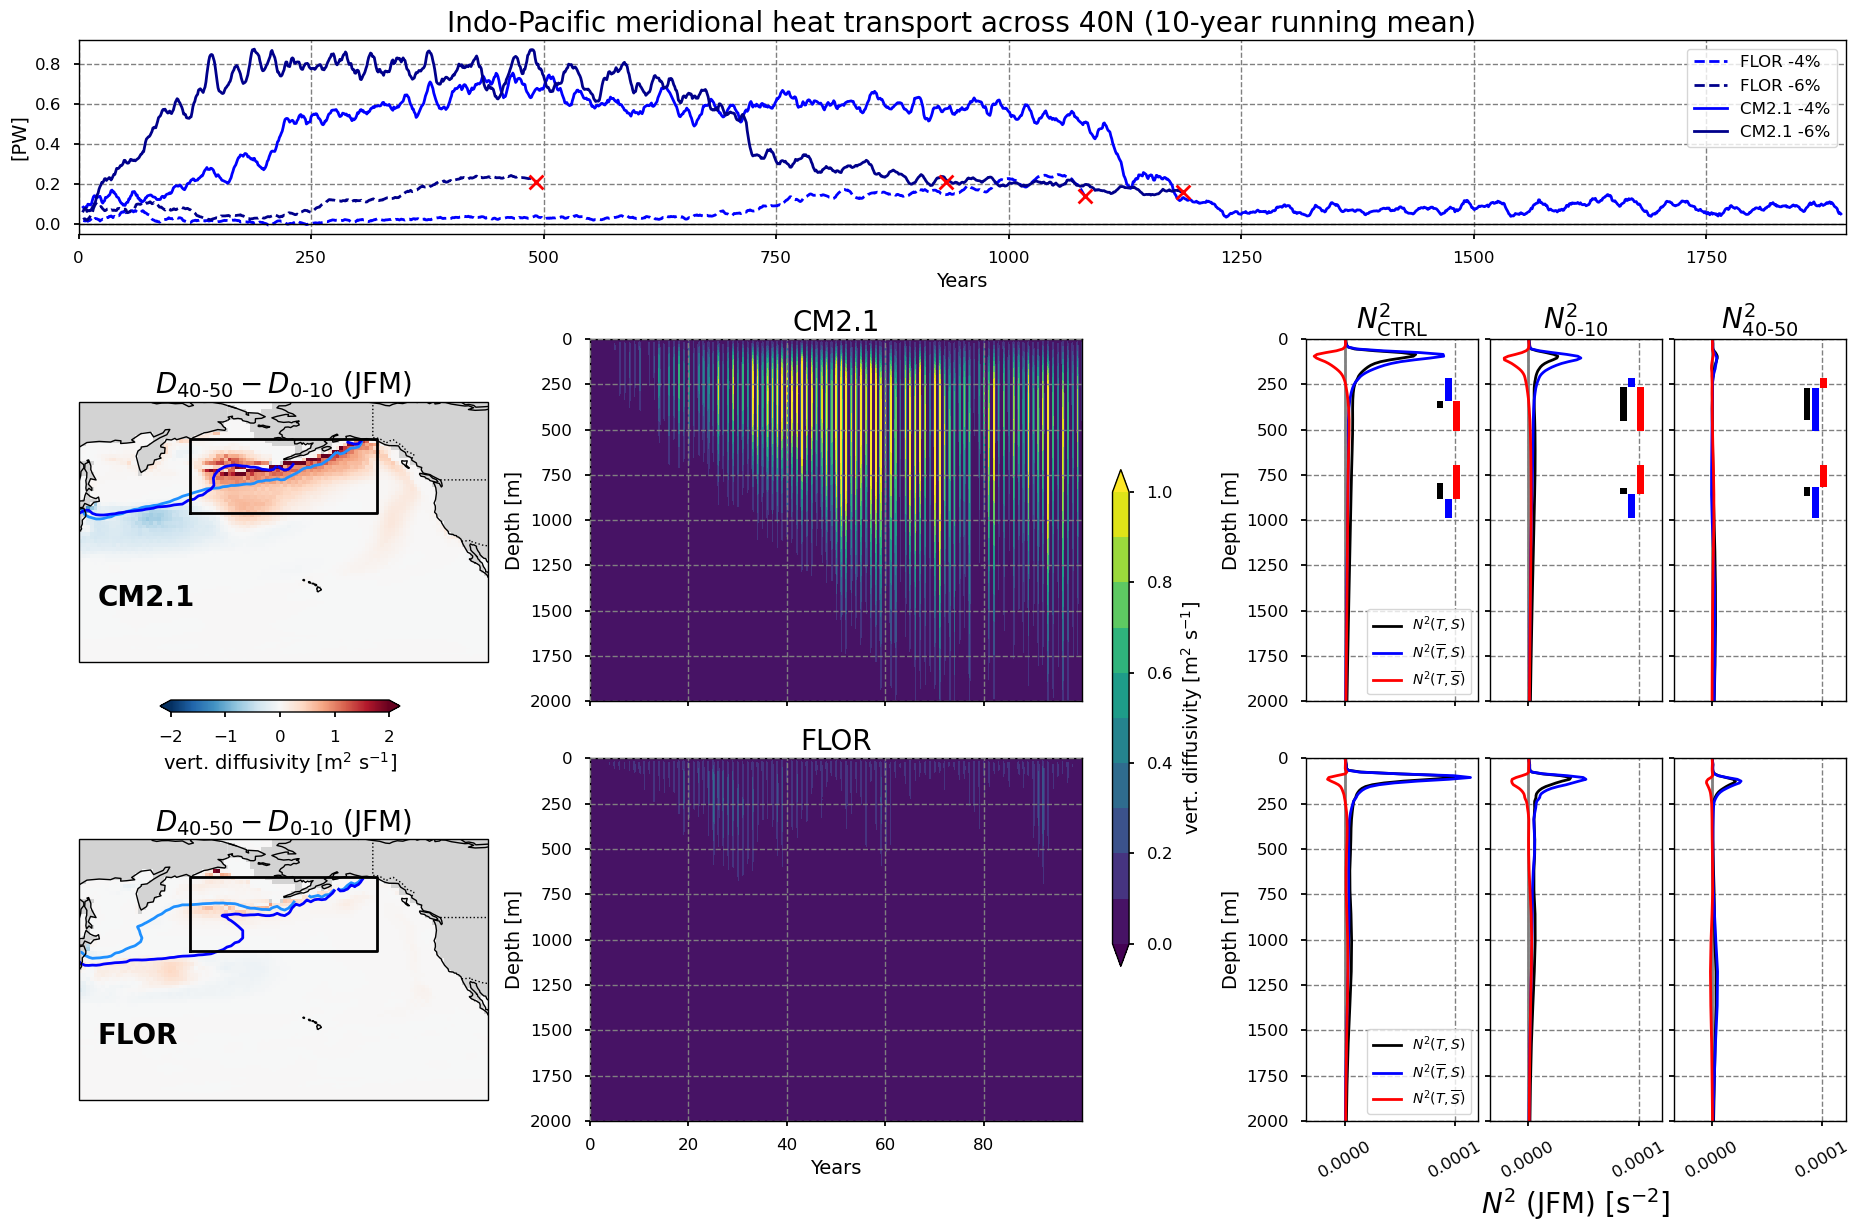

In [100]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.style.use('../func/paper.mplstyle')

fig = plt.figure(figsize=(18, 12), constrained_layout=False)  
gs = gridspec.GridSpec(3, 5, height_ratios=[1,1.5,1.5], width_ratios=[1, 1.5, .2,.2,.2])

# Top timeseries plot spanning the full width
ax0 = fig.add_subplot(gs[0, :])

# Bottom row: Hovmöller on the left (wider) and two maps stacked on the right
ax1 = fig.add_subplot(gs[1, 1])  # Hovmöller (wide)
ax3 = fig.add_subplot(gs[2, 1])  # Hovmöller (wide) sharing x and y

ax2 = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree(central_longitude=-180))  # Top map
ax4 = fig.add_subplot(gs[2, 0], projection=ccrs.PlateCarree(central_longitude=-180))  # Bottom map

# N^2 profiles
ax5 = fig.add_subplot(gs[1, 2]) # CM2.1 N^2
ax6 = fig.add_subplot(gs[1, 3], sharey=ax5, sharex=ax5) # CM2.1 N^2
ax7 = fig.add_subplot(gs[1, 4], sharey=ax5, sharex=ax5) # CM2.1 N^2

ax8 = fig.add_subplot(gs[2, 2], sharey=ax5, sharex=ax5) # FLOR N^2
ax9 = fig.add_subplot(gs[2, 3], sharey=ax5, sharex=ax5) # FLOR N^2
ax10 = fig.add_subplot(gs[2, 4], sharey=ax5, sharex=ax5) # FLOR N^2

#fig.set_constrained_layout_pads(w_pad=5, h_pad=5)

# Plot functions
plot_MHT_pacific(ax0)
cf = plot_hovmoller(fig, [ax1, ax3], CM21_box, FLOR_box, depth1=2000, depth2=0)
ax1.set_title('CM2.1')
ax3.set_title('FLOR')

# plot maps of diffusivity difference, years 40-50 minus 0-10
p = plot_map(ax2,CM21_diff,modelname='CM2.1', lat1=40, lat2=60, lon1=-190, lon2=-140)  # First map
plot_map(ax4,FLOR_diff,modelname='FLOR', lat1=40, lat2=60, lon1=-190, lon2=-140)  # Second map
# plot ice edge on maps
CM21_m6_ice_months = xr.open_dataarray('./processed_data/count_ice_months_MI_CM2.1p1_CTL1860_m6pctSolar.nc')
FLOR_m6_ice_months = xr.open_dataarray('./processed_data/count_ice_months_MI_FLOR_m6p0sol_CTL1860.nc')
plot_contours_icemonth_years(CM21_m6_ice_months, ax2, color='dodgerblue', firstyear=0, lastyear=10)
plot_contours_icemonth_years(CM21_m6_ice_months, ax2, color='b', firstyear=40, lastyear=50)
plot_contours_icemonth_years(FLOR_m6_ice_months, ax4, color='dodgerblue', firstyear=0, lastyear=10)
plot_contours_icemonth_years(FLOR_m6_ice_months, ax4, color='b', firstyear=40, lastyear=50)

ax2.set_title(r"$D_{40\text{-}50} - D_{0\text{-}10}$ (JFM)")
ax4.set_title(r"$D_{40\text{-}50} - D_{0\text{-}10}$ (JFM)")

###### plot N2 ######

### Control ###
CM21_CTRL_500, CM21_CTRL_2000 = plot_N2(ax5,
        JFM_mean(N2_CM21_CTRL).mean(('yt_ocean','xt_ocean')),
        JFM_mean(N2_CM21_CTRL_Tmean).mean(('yt_ocean','xt_ocean')),
        JFM_mean(N2_CM21_CTRL_Smean).mean(('yt_ocean','xt_ocean')))
FLOR_CTRL_500, FLOR_CTRL_2000 = plot_N2(ax8,
        JFM_mean(N2_FLOR_CTRL).mean(('yt_ocean','xt_ocean')),
        JFM_mean(N2_FLOR_CTRL_Tmean).mean(('yt_ocean','xt_ocean')),
        JFM_mean(N2_FLOR_CTRL_Smean).mean(('yt_ocean','xt_ocean')))

### beginning of timeseries ###
CM21_m6_10_500, CM21_m6_10_2000 = plot_N2(ax6,
        JFM_mean(N2_CM21_m6_10).mean(('yt_ocean','xt_ocean')),
        JFM_mean(N2_CM21_m6_10_Tmean).mean(('yt_ocean','xt_ocean')),
        JFM_mean(N2_CM21_m6_10_Smean).mean(('yt_ocean','xt_ocean')))
FLOR_m6_10_500, FLOR_m6_10_2000 = plot_N2(ax9,
        JFM_mean(N2_FLOR_m6_10).mean(('yt_ocean','xt_ocean')),
        JFM_mean(N2_FLOR_m6_10_Tmean).mean(('yt_ocean','xt_ocean')),
        JFM_mean(N2_FLOR_m6_10_Smean).mean(('yt_ocean','xt_ocean')))

### end of timeseries ###
CM21_m6_end_500, CM21_m6_end_2000 = plot_N2(ax7,
        JFM_mean(N2_CM21_m6_end).mean(('yt_ocean','xt_ocean')),
        JFM_mean(N2_CM21_m6_end_Tmean).mean(('yt_ocean','xt_ocean')),
        JFM_mean(N2_CM21_m6_end_Smean).mean(('yt_ocean','xt_ocean')))
FLOR_m6_end_500, FLOR_m6_end_2000 = plot_N2(ax10,
        JFM_mean(N2_FLOR_m6_end).mean(('yt_ocean','xt_ocean')),
        JFM_mean(N2_FLOR_m6_end_Tmean).mean(('yt_ocean','xt_ocean')),
        JFM_mean(N2_FLOR_m6_end_Smean).mean(('yt_ocean','xt_ocean')))

# plot bars
bar_labels = ['1','2','3']
make_inset_axis(ax5, bar_labels, CM21_CTRL_500 - FLOR_CTRL_500, location='upper right')
make_inset_axis(ax5, bar_labels, CM21_CTRL_2000 - FLOR_CTRL_2000, location='lower right')
make_inset_axis(ax6, bar_labels, CM21_m6_10_500 - FLOR_m6_10_500, location='upper right')
make_inset_axis(ax6, bar_labels, CM21_m6_10_2000 - FLOR_m6_10_2000, location='lower right')
make_inset_axis(ax7, bar_labels, CM21_m6_end_500 - FLOR_m6_end_500, location='upper right')
make_inset_axis(ax7, bar_labels, CM21_m6_end_2000 - FLOR_m6_end_2000, location='lower right')

ax5.set_title(r'$N^2_{\text{CTRL}}$')
ax6.set_title(r'$N^2_{0\text{-}10}$')
ax7.set_title(r'$N^2_{40\text{-}50}$')
ax5.set_xlabel('')
ax6.set_xlabel('')
ax7.set_xlabel('')
ax5.set_ylabel('Depth [m]')
ax8.set_ylabel('Depth [m]')
ax9.set_xlabel(r'$N^2$ (JFM) [s$^{-2}$]',fontsize=20)

ax1.tick_params(labelbottom=False)
ax5.tick_params(labelbottom=False)
ax6.tick_params(labelleft=False,labelbottom=False)  # Disables y-axis labels while keeping the ticks
ax7.tick_params(labelleft=False,labelbottom=False)  # Disables y-axis labels while keeping the ticks
ax9.tick_params(labelleft=False)  # Disables y-axis labels while keeping the ticks
ax10.tick_params(labelleft=False)  # Disables y-axis labels while keeping the ticks

# legends
ax5.legend(fontsize=10)
ax8.legend(fontsize=10)

plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.4)

#colorbars
# hovmoller
cbar = fig.colorbar(cf,ax=[ax1, ax3],shrink=0.7,aspect=30,orientation='vertical',pad=0.05)
cbar.set_label(r'vert. diffusivity [m$^2$ s$^{-1}$]')
# maps
map_cbar = fig.colorbar(p,ax=[ax2, ax4],label=r'vert. diffusivity [m$^2$ s$^{-1}$]',
                        orientation='horizontal', extend='both')
map_cbar.ax.set_position([0.01, 0.4, 0.3, 0.01])

# Manually adjust axis sizes
dx = 0.05
dy = 0.04

pos = ax0.get_position()  # Top Map: Get the original position
ax0.set_position([pos.x0, 
                     pos.y0, 
                     pos.width + dx, 
                     pos.height])

for ax in [ax1, ax3]: # Hovmoller plots
    pos = ax.get_position()  # Get the original position
    ax.set_position([pos.x0, 
                     pos.y0 - dy, 
                     pos.width, 
                     pos.height + dy*1.5])  

pos = ax2.get_position()  # Top Map: Get the original position
ax2.set_position([pos.x0-dx/2, 
                     pos.y0 - dy*2, 
                     pos.width + dx, 
                     pos.height + dy*2])  

pos = ax4.get_position()  # Bottom map: Get the original position
ax4.set_position([pos.x0-dx/2, 
                     pos.y0 - dy*5, 
                     pos.width + dx, 
                     pos.height + dy*2]) 

for ax in [ax5, ax6, ax7, ax8, ax9, ax10]: # N^2 plots
    pos = ax.get_position()  # Get the original position
    ax.set_position([pos.x0, 
                     pos.y0 - dy, 
                     pos.width + dx, 
                     pos.height + dy*1.5])  

plt.savefig("Figure5.jpg", bbox_inches='tight', dpi=300)  # Prevents clipping
#plt.savefig("Figure5.png", dpi=300)  # Prevents clipping

plt.show()